<a href="https://colab.research.google.com/github/rskadikar/USC-TAC359-F25-hw2-rskadikar/blob/main/hw2_TAC359_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

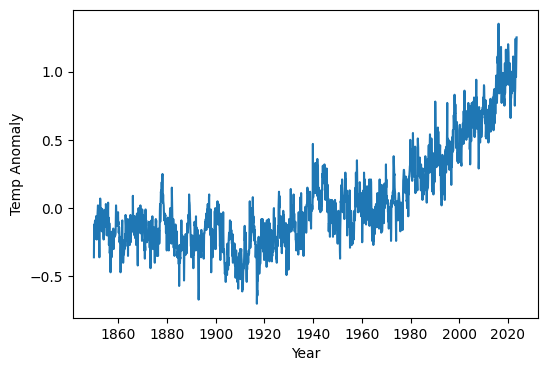

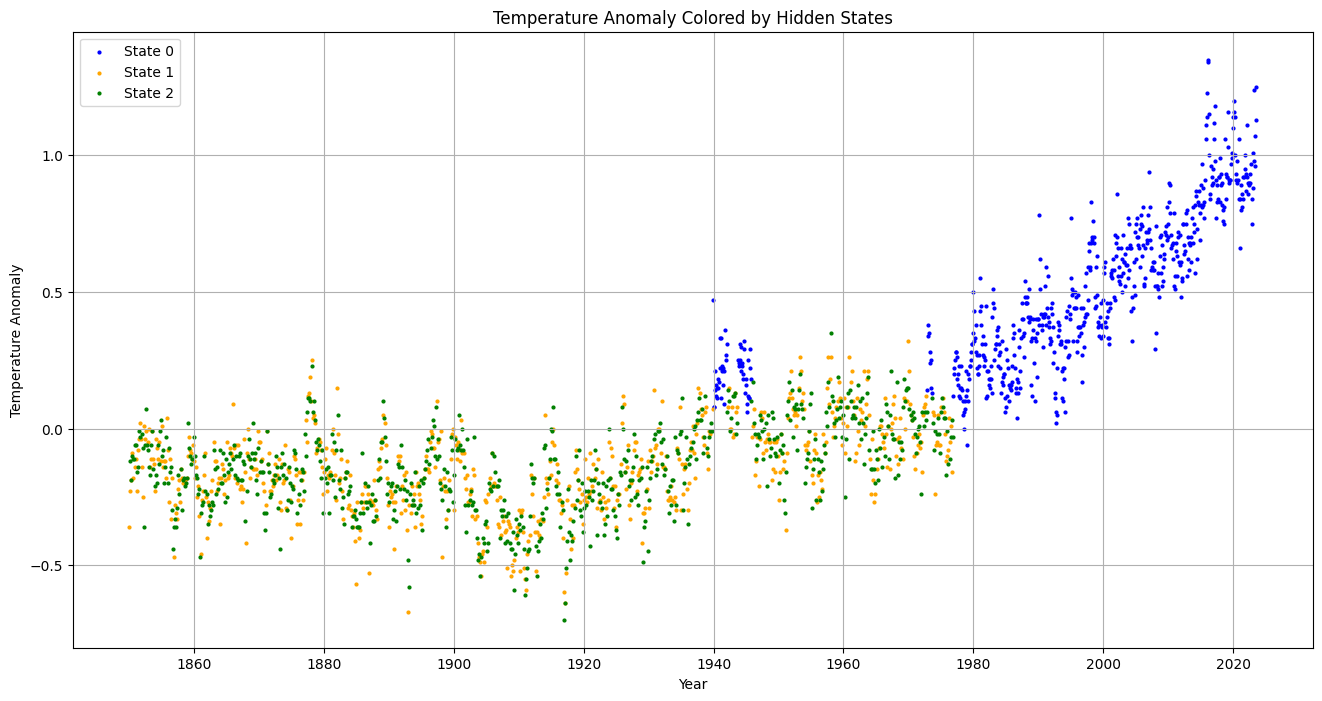

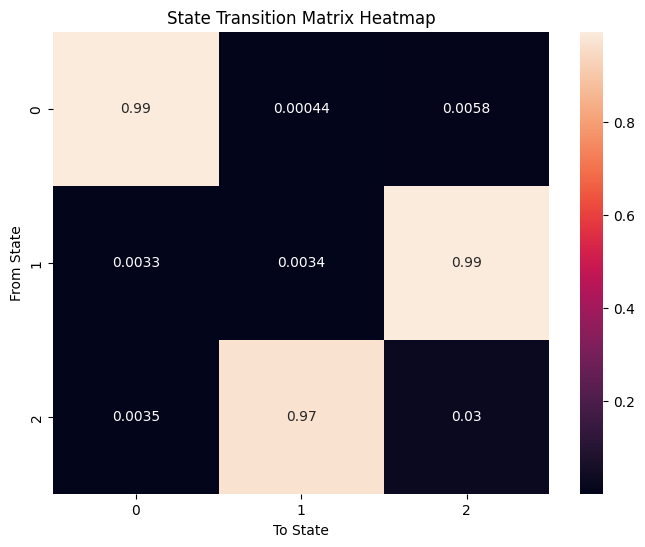

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import math
from hmmlearn import hmm
import seaborn as sns

# import data and convert year to datetime
df = pd.read_csv('temperature.csv')
df['Year'] = pd.to_datetime(df['Year'])

# plot temperature anomaly vs year
plt.figure(figsize=[6, 4])
plt.plot(df['Year'], df['Anomaly'])
plt.xlabel('Year')
plt.ylabel('Temp Anomaly')
plt.show()

# save the temp anomaly into a 2D array
temp = df['Anomaly'].values.astype('float32').reshape(-1, 1)

# scale the array using minmaxscaler
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(temp)

# train & fit model
model = hmm.GaussianHMM(n_components=3, n_iter=100)
model.fit(scaled_temp)

# predict hidden states
hidden_states = model.predict(scaled_temp)

# plot
plt.figure(figsize = [16, 8])
state_0 = hidden_states == 0
state_1 = hidden_states == 1
state_2 = hidden_states == 2

plt.scatter(df['Year'][state_0], df['Anomaly'][state_0], c='blue', s = 4, label='State 0')
plt.scatter(df['Year'][state_1], df['Anomaly'][state_1], c='orange', s = 4, label='State 1')
plt.scatter(df['Year'][state_2], df['Anomaly'][state_2], c='green', s = 4, label='State 2')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Colored by Hidden States')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(model.transmat_, annot=True)
plt.title('State Transition Matrix Heatmap')
plt.xlabel('To State')
plt.ylabel('From State')
plt.show()



